In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load dữ liệu từ file CSV (ví dụ)
df = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ACB.csv')
df1=df.reset_index()['Price']
df1.describe

<bound method NDFrame.describe of 0        3910.0
1        3910.0
2        3885.1
3        3885.1
4        3910.0
         ...   
2488    22800.0
2489    23050.0
2490    23200.0
2491    23250.0
2492    23250.0
Name: Price, Length: 2493, dtype: float64>

In [3]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_train.shape[1])
X_train, y_train

(array([[0.00094051, 0.00094051, 0.        , ..., 0.00564308, 0.00658359,
         0.00752411],
        [0.00094051, 0.        , 0.        , ..., 0.00658359, 0.00752411,
         0.00846462],
        [0.        , 0.        , 0.00094051, ..., 0.00752411, 0.00846462,
         0.00846462],
        ...,
        [0.63323752, 0.65778908, 0.63701468, ..., 0.72766658, 0.72955516,
         0.72200084],
        [0.65778908, 0.63701468, 0.60868596, ..., 0.72955516, 0.72200084,
         0.71255793],
        [0.63701468, 0.60868596, 0.63890326, ..., 0.72200084, 0.71255793,
         0.70500361]]),
 array([0.00846462, 0.00846462, 0.00470257, ..., 0.71255793, 0.70500361,
        0.71444651]))

In [8]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [9]:
# Dự báo
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform([y_test])
test_predict

array([[24343.72],
       [23734.  ],
       [23749.72],
       [24571.24],
       [24827.44],
       [24655.76],
       [25596.4 ],
       [25433.92],
       [24713.28],
       [25397.4 ],
       [24679.4 ],
       [24408.4 ],
       [24783.  ],
       [24803.2 ],
       [24844.  ],
       [24724.12],
       [24762.6 ],
       [24727.  ],
       [24898.4 ],
       [24914.4 ],
       [25031.92],
       [24723.  ],
       [23913.  ],
       [24731.4 ],
       [24655.12],
       [24473.84],
       [23865.  ],
       [24132.8 ],
       [23850.  ],
       [24436.2 ],
       [24526.8 ],
       [24605.92],
       [24673.  ],
       [24702.6 ],
       [24590.6 ],
       [24692.8 ],
       [24971.92],
       [24975.8 ],
       [24934.  ],
       [24962.  ],
       [24909.8 ],
       [24968.4 ],
       [24903.2 ],
       [25044.  ],
       [24952.4 ],
       [24921.4 ],
       [24867.4 ],
       [24945.4 ],
       [24833.12],
       [24357.4 ],
       [24433.6 ],
       [24123.  ],
       [2377

In [10]:
# Dự báo giá trị 30 ngày trong tương lai
last_30_days = df1[-30:]
next_30_days = []
for i in range(30):
    x = last_30_days[-time_step:].reshape(1, time_step)
    y_hat = model.predict(x)
    next_30_days.append(y_hat)
    last_30_days = np.append(last_30_days, y_hat)

next_30_days = np.array(next_30_days).reshape(-1, 1)
next_30_days = scaler.inverse_transform(next_30_days)

print(next_30_days)

[[23176.6 ]
 [23203.68]
 [23262.96]
 [23190.56]
 [23126.88]
 [23067.64]
 [23073.56]
 [23054.48]
 [23048.2 ]
 [23054.52]
 [23031.48]
 [23083.52]
 [23036.84]
 [23159.64]
 [23098.36]
 [23141.52]
 [23115.08]
 [23123.72]
 [23160.36]
 [23157.32]
 [23166.76]
 [23203.04]
 [23235.04]
 [23233.52]
 [23229.08]
 [23245.8 ]
 [23240.52]
 [23245.36]
 [23240.52]
 [23240.52]]


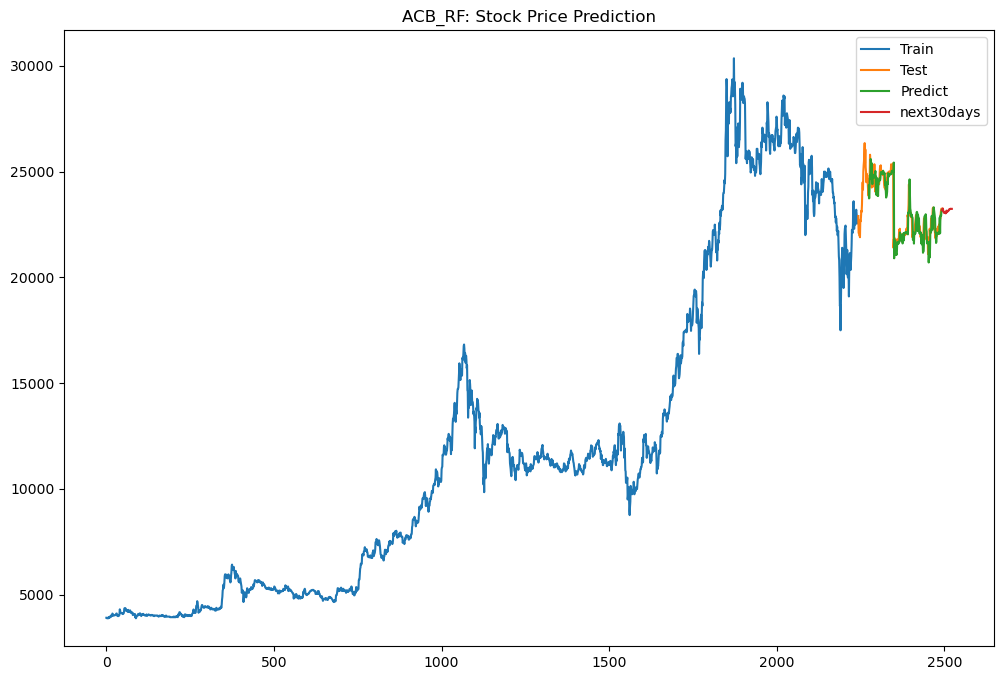

In [11]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
from matplotlib import pyplot as plt

# train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label="Train")
# plt.plot([*train_range], pred_train.squeeze(), label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
# test_range = range(len(y_true_train.squeeze()),len(y_true_train.squeeze()) + len(y_true_test.squeeze()))
plt.plot(test_data_index, scaler.inverse_transform(test_data), label="Test")
test_data_index = pd.RangeIndex(start=train_size+31, stop=len(df1), step=1)
plt.plot(test_data_index, test_predict.squeeze(), label="Predict", linestyle="-")

#30 days
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index, next_30_days.squeeze(), label="next30days")

# # Dự đoán 30 điểm tiếp theo
plt.legend()
plt.title('ACB_RF: Stock Price Prediction')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
test_score_mape = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100
test_score_mda = calculate_mda(y_test[0], test_predict[:, 0])
msle = mean_squared_log_error(y_test[0], test_predict[:, 0])

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')
print('MSLE trên tập test là:', msle)

RMSE trên tập test là: 454.825363573507
MAPE trên tập test là: 1.2898368168150318 %
MDA trên tập test là: 39.908256880733944 %
MSLE trên tập test là: 0.0003854491313537858
